## Cloning Quasar

In [1]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

downloading DR7 quasar dataset from http://das.sdss.org/va/qsocat/dr7qso.dat.gz to C:\Users\domen\astroML_data
[=========================================]  12.82Mb / 12.82Mb   


In [2]:
import astropy
astropy.cosmology.Planck18

FlatLambdaCDM(name='Planck18', H0=<Quantity 67.66 km / (Mpc s)>, Om0=0.30966, Tcmb0=<Quantity 2.7255 K>, Neff=3.046, m_nu=<Quantity [0.  , 0.  , 0.06] eV>, Ob0=0.04897)

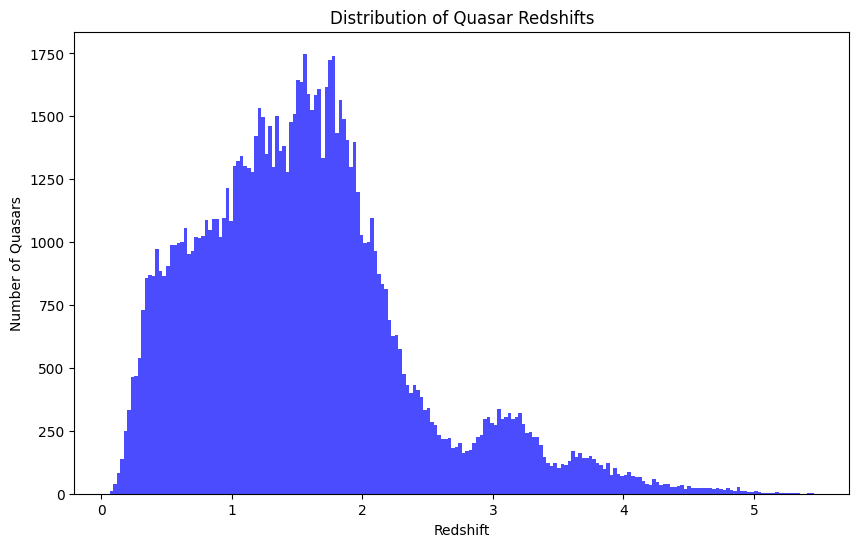

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
data_path = r"C:\Users\domen\astroML_data"


data = np.load(os.path.join(data_path, 'dr7_quasar.npy'))
plt.figure(figsize=(10, 6))
plt.hist(data['redshift'], bins=200, color='blue', alpha=0.7)
plt.xlabel('Redshift')
plt.ylabel('Number of Quasars')
plt.title('Distribution of Quasar Redshifts')
plt.show()

generating points: 100%|██████████| 1000000/1000000 [00:20<00:00, 49668.49it/s]


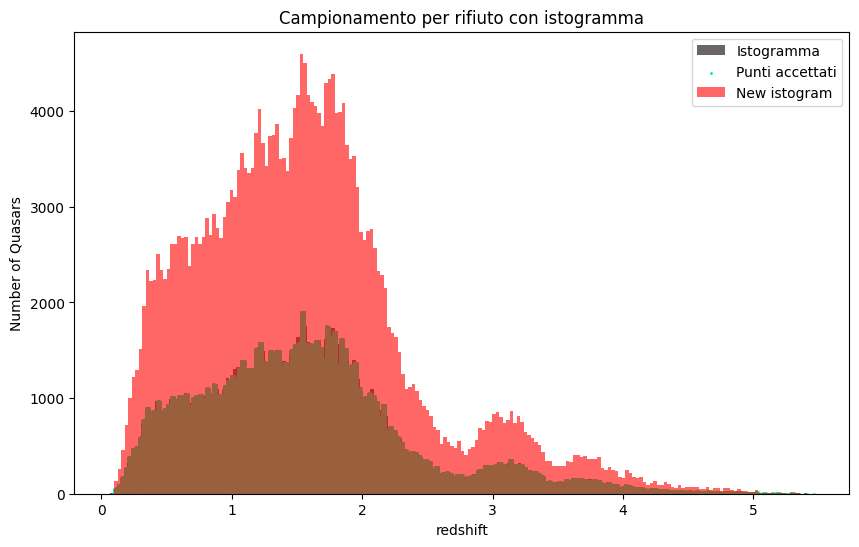

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from tqdm import tqdm
import os
data_path = r"C:\Users\domen\astroML_data"
data = np.load(os.path.join(data_path, 'dr7_quasar.npy'))
# Parametri
N = 1000000
xmin = 0.1
xmax = 5.5
ymin = 0.0
Bins = 200
redshift = data['redshift']
n, bins = np.histogram(redshift, bins=Bins, range=(xmin, xmax), density=False)

# Calcolare la larghezza di ogni bin
bin_width = bins[1] - bins[0]

# Calcolare il massimo dell'istogramma
max_y = np.max(n)  # il massimo valore dell'istogramma

# Lista per i punti accettati
accepted_points = []
rejected_points = []

# Campionamento per rifiuto
for i in tqdm(range(N), desc='generating points'):
    xi = np.random.uniform(xmin, xmax)
    yi_random = np.random.uniform(0, max_y)  # y casuale tra 0 e max_y
    
    # Trova il bin corrispondente per xi
    bin_index = np.digitize(xi, bins) - 1  # Trova il bin a cui appartiene xi
    
    # Calcolare il valore dell'istogramma per quel bin (non normalizzato)
    y_histogram = n[bin_index]  # Densità dell'istogramma per quel bin
    
    # Accetta il punto solo se y_random è minore di y_histogram
    if yi_random < y_histogram:
        accepted_points.append((xi, yi_random))
    else:
        rejected_points.append((xi, yi_random))

# Converti i punti accettati in un array per facilitarne la visualizzazione
accepted_points = np.array(accepted_points)
rejected_points = np.array(rejected_points)
# Visualizzare i risultati
plt.figure(figsize=(10, 6))

# Visualizzare l'istogramma (non normalizzato)
plt.hist(redshift, bins = Bins, alpha=0.6, color='#090101', label='Istogramma')

# Mostrare i punti accettati
plt.scatter(accepted_points[:, 0], accepted_points[:, 1], color='#05ED98', alpha=1, label='Punti accettati', s=1)
#plt.scatter(rejected_points[:, 0], rejected_points[:, 1], color='red', alpha=1, label='Punti scartati', s=1)
plt.hist(accepted_points[:, 0], bins=Bins, alpha=0.6, color='red', label='New istogram')

plt.xlabel('redshift')
plt.ylabel('Number of Quasars')
plt.title('Campionamento per rifiuto con istogramma')
plt.legend()
plt.show()


Quasars are selected based on luminosity and other characteristics, which might introduce a bias. Brighter quasars are easier to detect and therefore more common in observational samples.